In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, accuracy_score
from pycaret.classification import *

In [2]:
seed = 42
np.random.seed(seed)
set_config('seed', seed)

# 1. 데이터 로드

In [3]:
train=pd.read_csv('input/train.csv', index_col=0) #인덱스 col=0도 check!
test=pd.read_csv('input/test.csv', index_col=0)
submission=pd.read_csv('input/sample_submission.csv', index_col=0)  

In [4]:
train['income']=pd.factorize(train['income'], sort=True)[0]

In [ ]:
train.shape, test.shape

In [ ]:
train.head(3)
test.head(3)

# 2. EDA & 전처리

In [ ]:
train.info()
train.describe()
train.describe(include='O')

In [ ]:
df = pd.concat([train, test])
df.shape

In [ ]:
train.info

## Missing Value

In [ ]:
train.isnull().sum().sum()
test.isnull().sum().sum()

## CovariateShift

### outlier

In [5]:
train.drop(['education'],axis=1, inplace=True)
test.drop(['education'],axis=1, inplace=True)

# 3. 모델 학습

In [ ]:
import gc
gc.collect()

In [ ]:
train.columns

In [6]:
%%time
clf = setup(session_id=seed, 
            data = train, target = 'income'
          #, categorical_features=col_cat
          , numeric_features = ['education_num']
          #, ignore_features =tp.tolist() + wr.tolist() + wf.tolist()#'religion', 'race_1', 'race_2', 'race_3','race_4', 'race_5', 'race_6']
           )

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(26049, 14)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Wall time: 15.4 s


In [7]:
best_3 = compare_models(sort = 'F1', n_select = 3
                       ,exclude=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'ridge','qda']
                       #,exclude=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp', 'ridge', 'rf', 'qda', 'ada', 'xgboost']
                       )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8668,0.9209,0.6517,0.7640,0.7031,0.6179,0.6214,2.4957
1,Light Gradient Boosting Machine,0.8665,0.9218,0.6445,0.7670,0.7003,0.6152,0.6192,0.3141
2,CatBoost Classifier,0.8664,0.9247,0.6364,0.7723,0.6974,0.6127,0.6177,12.1750
3,Gradient Boosting Classifier,0.8636,0.9199,0.6086,0.7797,0.6835,0.5982,0.6058,2.1776
4,Ada Boost Classifier,0.8569,0.9129,0.6141,0.7496,0.6748,0.5842,0.5892,0.7540
5,Random Forest Classifier,0.8452,0.8774,0.5717,0.7307,0.6413,0.5444,0.5513,0.1233
6,Extra Trees Classifier,0.8366,0.8831,0.6012,0.6864,0.6405,0.5355,0.5377,0.7141
7,Linear Discriminant Analysis,0.8369,0.8924,0.5746,0.6986,0.6300,0.5267,0.5312,0.1909


In [8]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8625,0.9233,0.6456,0.7514,0.6945,0.6065,0.6094
1,0.8641,0.9192,0.6553,0.7514,0.7001,0.6127,0.6151
2,0.8555,0.9219,0.6084,0.7475,0.6708,0.5795,0.5845
3,0.8734,0.9313,0.6418,0.7952,0.7103,0.6305,0.6364
4,0.8699,0.9248,0.6586,0.7708,0.7103,0.6271,0.6303
Mean,0.8651,0.9241,0.6420,0.7633,0.6972,0.6113,0.6152
SD,0.0062,0.0040,0.0179,0.0179,0.0145,0.0182,0.0182


In [9]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8735,0.9295,0.6586,0.7842,0.7159,0.6354,0.6394


In [10]:
%%time
final_model = finalize_model(blended)

Wall time: 3min 32s


In [11]:
predictions = predict_model(final_model, data = test)

# 4. 예측

In [12]:
submission['prediction'] = predictions['Label']

# 5. 제출

In [13]:
submission.to_csv('output/20201015-2.csv')

In [14]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8614,0.9199,0.5955,0.7797,0.6752,0.5891,0.5978
1,0.8614,0.9166,0.6278,0.7578,0.6867,0.5987,0.6031
2,0.8575,0.9115,0.6149,0.7510,0.6762,0.5860,0.5908
3,0.8644,0.9131,0.6071,0.7824,0.6837,0.5992,0.6070
4,0.8566,0.9108,0.5890,0.7647,0.6654,0.5761,0.5841
5,0.8629,0.9289,0.6019,0.7815,0.6801,0.5947,0.6029
6,0.8730,0.9387,0.6181,0.8128,0.7022,0.6234,0.6328
7,0.8597,0.9180,0.5955,0.7731,0.6728,0.5854,0.5935
8,0.8613,0.9209,0.5890,0.7845,0.6728,0.5871,0.5968
9,0.8777,0.9208,0.6472,0.8097,0.7194,0.6425,0.6491


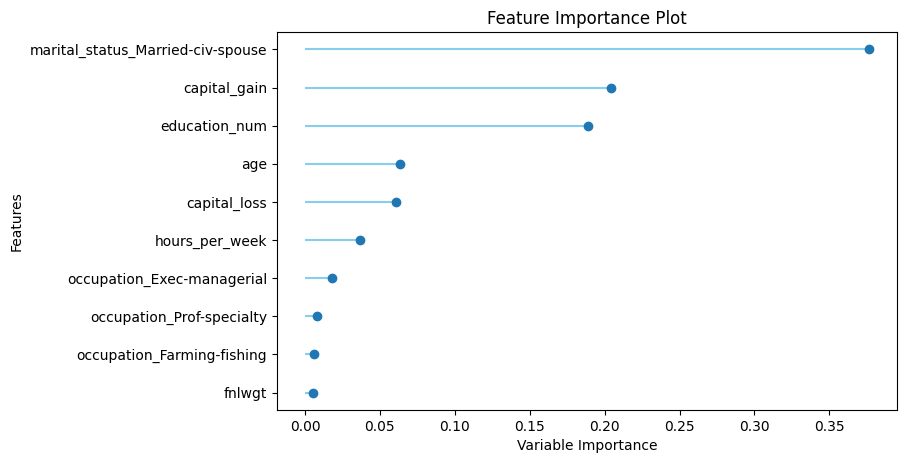

In [15]:
plot_model(estimator = gbc, plot = 'feature')

In [17]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8677,0.9236,0.6343,0.7778,0.6988,0.6151,0.6203
1,0.8661,0.9185,0.6602,0.7556,0.7047,0.6186,0.6209
2,0.8559,0.9152,0.6440,0.7289,0.6838,0.5910,0.5929
3,0.8542,0.9177,0.6039,0.7440,0.6667,0.5747,0.5798
4,0.8574,0.9096,0.6214,0.7471,0.6784,0.5878,0.5919
5,0.8723,0.9306,0.6602,0.7786,0.7145,0.6330,0.6365
6,0.8809,0.9361,0.6602,0.8127,0.7286,0.6533,0.6591
7,0.8683,0.9211,0.6472,0.7722,0.7042,0.6204,0.6244
8,0.8691,0.9262,0.6343,0.7840,0.7013,0.6187,0.6243
9,0.8730,0.9193,0.6796,0.7692,0.7216,0.6398,0.6419


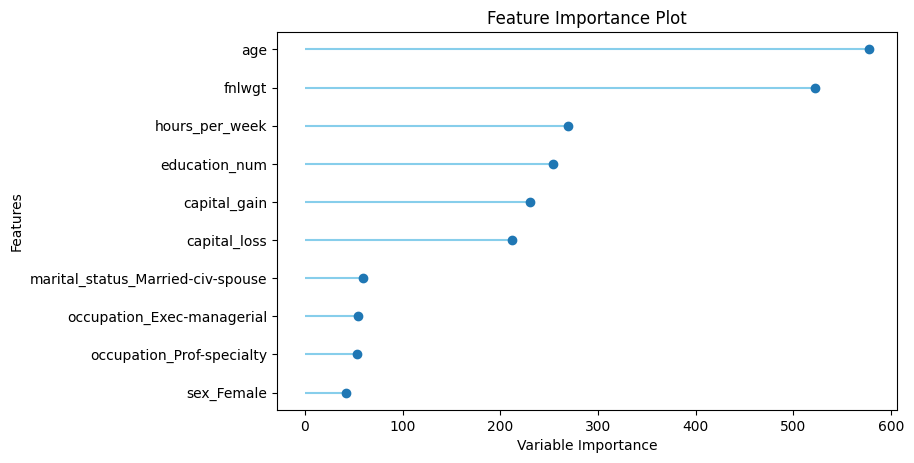

In [18]:
plot_model(estimator = lightgbm, plot = 'feature')